# Data visualization

### Import libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.figure(figsize=(20,5))
palette = sns.color_palette('Paired', 10)

<Figure size 1440x360 with 0 Axes>

## Import data

In [5]:
cwd = os.getcwd()
simp_path = 'raw_data/historical_stock_prices.csv'
abs_path = os.path.abspath(os.path.join(cwd,'..',simp_path))
df = pd.read_csv(abs_path)

In [6]:
simp_path2 = 'raw_data/historical_stocks.csv'
abs_path2 = os.path.abspath(os.path.join(cwd,'..',simp_path2))
df2 = pd.read_csv(abs_path2)

In [7]:
simp_path3 = 'raw_data/constituents_csv.csv'
abs_path3 = os.path.abspath(os.path.join(cwd,'..',simp_path3))
df3 = pd.read_csv(abs_path3)

In [8]:
df3['ticker'] = df3['Symbol']

In [9]:
df3 = df3['ticker']

In [10]:
df = df.merge(df3, on="ticker")

In [11]:
df.shape

(3370001, 8)

In [12]:
print(f"We have {df.ticker.nunique()} in the dataframe")

We have 482 in the dataframe


In [13]:
df.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18


In [14]:
len(df)

3370001

In [15]:
len(df[df['ticker']=='AAPL'])

9507

In [16]:
df.columns

Index(['ticker', 'open', 'close', 'adj_close', 'low', 'high', 'volume',
       'date'],
      dtype='object')

In [17]:
df2 = df2[['ticker', 'sector']]

In [18]:
df = df.merge(df2, on='ticker', how='left')

In [19]:
df.isnull().sum()

ticker          0
open            0
close           0
adj_close       0
low             0
high            0
volume          0
date            0
sector       1941
dtype: int64

In [20]:
df.sector.unique()

array(['TECHNOLOGY', 'FINANCE', 'CONSUMER DURABLES', 'CONSUMER SERVICES',
       'HEALTH CARE', 'PUBLIC UTILITIES', 'CONSUMER NON-DURABLES',
       'MISCELLANEOUS', 'ENERGY', 'BASIC INDUSTRIES', 'TRANSPORTATION',
       'CAPITAL GOODS', nan], dtype=object)

In [21]:
df = df[df.ticker != 'FRC']

In [22]:
df.isnull().sum()

ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
sector       0
dtype: int64

In [36]:
df.date = pd.to_datetime(df.date)

In [38]:
df.dtypes

ticker               object
open                float64
close               float64
adj_close           float64
low                 float64
high                float64
volume                int64
date         datetime64[ns]
sector               object
dtype: object

In [40]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [41]:
df.dtypes

ticker               object
open                float64
close               float64
adj_close           float64
low                 float64
high                float64
volume                int64
date         datetime64[ns]
sector               object
year                  int64
month                 int64
day                   int64
dtype: object

In [42]:
df.head

<bound method NDFrame.head of         ticker       open      close  adj_close        low       high  \
0         AAPL   0.513393   0.513393   0.023186   0.513393   0.515625   
1         AAPL   0.488839   0.486607   0.021977   0.486607   0.488839   
2         AAPL   0.453125   0.450893   0.020364   0.450893   0.453125   
3         AAPL   0.462054   0.462054   0.020868   0.462054   0.464286   
4         AAPL   0.475446   0.475446   0.021473   0.475446   0.477679   
...        ...        ...        ...        ...        ...        ...   
3369996   MNST  62.500000  62.090000  62.090000  61.820000  62.639999   
3369997   MNST  62.450001  61.860001  61.860001  61.700001  62.500000   
3369998   MNST  61.750000  61.009998  61.009998  60.980000  61.750000   
3369999   MNST  60.980000  60.680000  60.680000  60.650002  61.180000   
3370000   MNST  60.840000  60.650002  60.650002  60.500000  61.119999   

            volume       date                 sector  year  month  day  
0        117258400 1

# get rid of years before 2000

In [43]:
df = df[df.year>1999]

In [44]:
df.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

## Saving new DataFrame

In [45]:
cwd = os.getcwd()
save_path = 'raw_data/df.csv'
abs_path5 = os.path.abspath(os.path.join(cwd,'..',save_path))
df.to_csv(abs_path5, index=False)

## Data exploration

<AxesSubplot:title={'center':'sector'}>

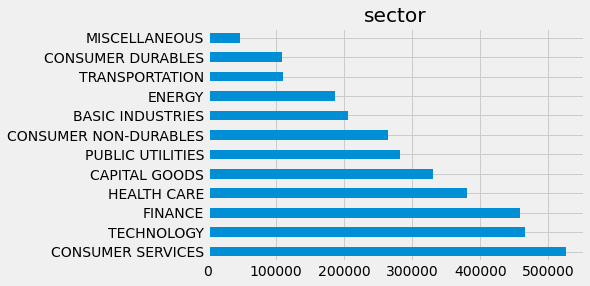

In [24]:
df['sector'].value_counts().plot(kind='barh', title='sector')

-Data has no null values

In [25]:
df_grp_tick = df.groupby(['sector'])['volume'].sum().reset_index()
df_grp_tick.head()

,sector,volume
0,BASIC INDUSTRIES,494234721700
1,CAPITAL GOODS,750501953986
2,CONSUMER DURABLES,105777134500
3,CONSUMER NON-DURABLES,816500721125
4,CONSUMER SERVICES,1723071350300


<AxesSubplot:xlabel='sector', ylabel='volume'>

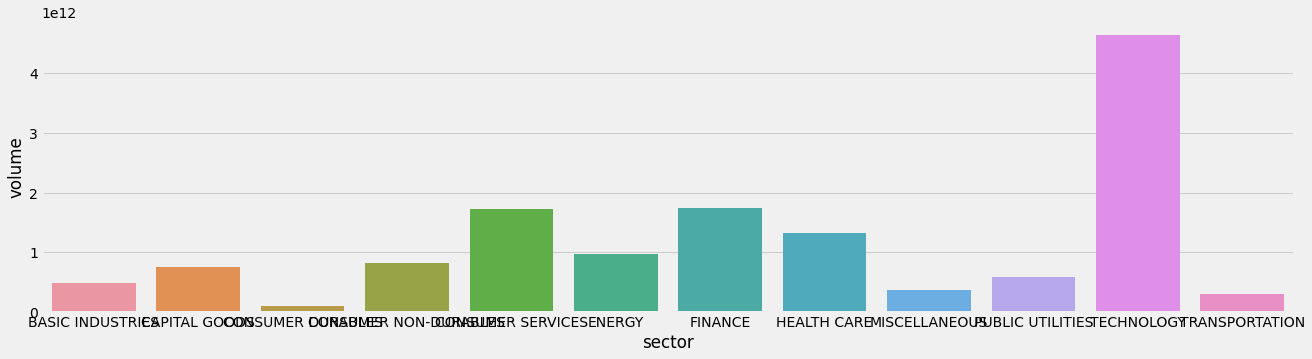

In [26]:
plt.figure(figsize=(20,5))
sns.barplot(x='sector', y='volume', data=df_grp_tick)

Text(0, 0.5, '')

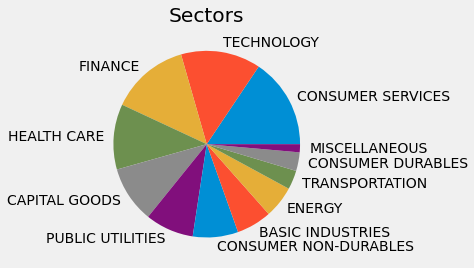

In [27]:
ax=df['sector'].value_counts().plot(kind='pie', title='Sectors')
ax.set_ylabel('')

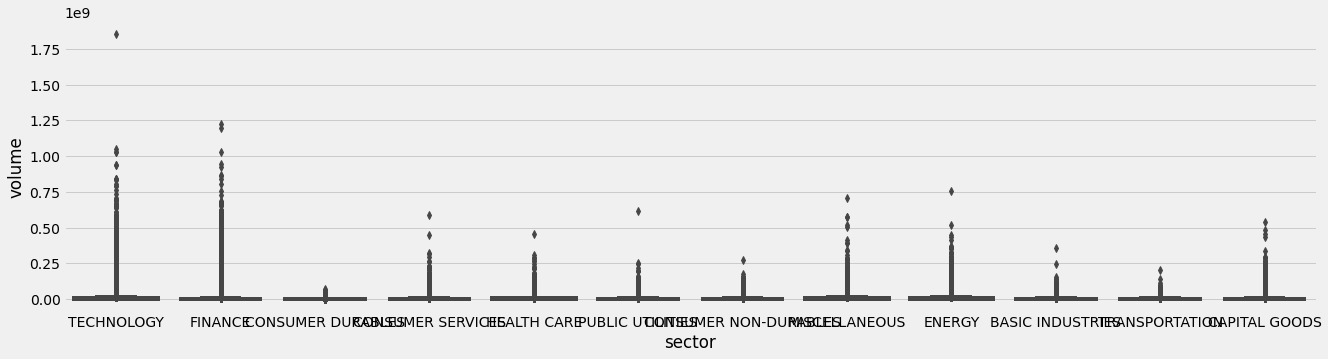

In [28]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x='sector', y='volume', data=df)
